# STAT 345: Nonparametric Statistics

## Lesson 01.2: Random Samples, Inference and Confidence Intervals

**Reading: Conover Sections 2.1-2.2**

*Prof. John T. Whelan*

Tuesday 21 January 2025

These lecture slides are in a computational notebook.  You have access to them through http://vmware.rit.edu/

Flat HTML and slideshow versions are also in MyCourses.

The notebook can run Python commands (other notebooks can use R or Julia; "Ju-Pyt-R").  Think: computational data analysis, not "coding".

Standard commands to activate inline interface and import libraries:

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

## 1 Random Samples

A typical scenario in statistical inference involves a data set
$x_1,x_2,\ldots,x_n\equiv \{x_i\}\equiv{{\mathbf{x}}}$ which is assumed
to be a realization of $n$ independent random variables
${\color{royalblue}{X_1}},{\color{royalblue}{X_2}},\ldots,{\color{royalblue}{X_n}}\equiv \{{\color{royalblue}{X_i}}\}\equiv{{\mathbf{{\color{royalblue}{X}}}}}$
all drawn from some distribution $f(x)$.

(There are of course more complicated scenarios, like two random
    samples $\{{\color{royalblue}{X_i}}\}$ and $\{{\color{royalblue}{Y_j}}\}$ from
    different distributions, but we’ll consider the simple case first
    for convenience.)

In the formalism of probability
theory, there is a joint distribution function
$$f(x_1,x_2,\ldots,x_n) = f(x_1)f(x_2)\cdots f(x_n)
  \ .$$ the typical goal of statistical inference is to say something
about the distribution function $f(x)$ based on the observed data
$\{x_i\}$.

(When talking about the distribution $f(x)$, it’s conventional to
    talk about a random variable ${\color{royalblue}{X}}$ with that
    distribution. Of course ${\color{royalblue}{X_1}}$,
    ${\color{royalblue}{X_2}}$, etc all have this distribution, so statements
    about e.g., ${E\left[{\color{royalblue}{X}}\right]}$ apply equally well
    to ${E\left[{\color{royalblue}{X_1}}\right]}$,
    ${E\left[{\color{royalblue}{X_2}}\right]}$, etc.)

In conventional applications, inference usually means
constraining the unknown values of parameters
$\theta_1,\theta_2,\ldots,\theta_p\equiv\{\theta_j\}\equiv{{\boldsymbol{\theta}}}$
in the distribution $f(x;{{\boldsymbol{\theta}}})$, such as the mean
$\mu$ and/or standard deviation $\sigma$ in a normal distribution.

Of
course, in non-parametric statistics, the information we’re interested
in not typically parameter values but rather more general information
about the sampling distribution $f(x)$, but it’s helpful to have a
reminder about the standard procedures.

If our uncertainty about the sampling distribution $f(x;\theta)$ can be
described by a parameter $\theta$, the standard problem of parametric
inference is to make a statement about the unknown value $\theta$ given
the actual observed data ${{\mathbf{x}}}\equiv
x_1,x_2,\ldots,x_n$.

The difficulty is that what we actually have a
mathematical description for is the probability distribution of the
random vector ${{\mathbf{{\color{royalblue}{X}}}}}$ given the value of
$\theta$: $f({{\mathbf{x}}};\theta)$. This tells us about the
probabilities associated with collecting additional data sets of the
same sort as ${{\mathbf{x}}}$.

Bayesian statistics gets around this by
interpreting $f({{\mathbf{x}}};\theta)$ as a conditional probability
distribution $f({{\mathbf{x}}}|\theta,I)$ (given a value of $\theta$ and
background information $I$, e.g., that the parameterized model is the
correct description in the first place) and using Bayes’s Theorem to
construct
$$f(\theta|{{\mathbf{x}}},I) = \frac{f({{\mathbf{x}}}|\theta,I)\,f(\theta|I)}{f({{\mathbf{x}}}|I)}$$
which is a **posterior probability distribution** describing our
knowledge of the parameter $\theta$ after we’ve collected the data
${{\mathbf{x}}}$.

Classical frequentist methods instead construct a statistic
$T({{\mathbf{x}}})$ from the data, and describe the probability
distribution of the random variable $T({{\mathbf{{\color{royalblue}{X}}}}})$
for possible values of $\theta$. Roughly speaking, reasonable values of
$\theta$ are those for which the value $T({{\mathbf{x}}})$ is a
“typical” value according to the behavior of the statistic
$T({{\mathbf{{\color{royalblue}{X}}}}})$.

## 2 Simulated Samples and Monte Carlo Methods

There are a lot of theoretical and analytical methods to derive the properties of a statistic $T({{\mathbf{{\color{royalblue}{X}}}}})$ from those of the underlying distribution $f({{\mathbf{x}}}|\theta,I)$.  However, it is often useful to examine these properties using **Monte Carlo** simulations.  This could be as a cross-check on the derived properties, or because the situation is complicated enough that the derivation is difficult or impossible.

The `scipy.stats` module includes routines to generate random numbers according to known distributions.  For instance, to get a sample of 5 numbers from a standard normal distribution, you'd do this:

In [3]:
z_i = stats.norm.rvs(size=5); z_i

array([-0.87416369, -0.64125829,  0.17996499,  0.66762232, -0.37680891])

and if you call it again you'll get a different set of numbers

In [4]:
z_i = stats.norm.rvs(size=5); z_i

array([ 0.90509587, -0.70784294, -1.02584764, -0.49394069, -0.30211632])

Technically **pseudorandom** numbers, generated according to unpredictable mathematical procedures.  Can **seed** the random number generator, to choose reproducible starting point for pseudorandom sequence:

In [5]:
np.random.seed(8675309)
z_i = stats.norm.rvs(size=5); z_i

array([ 0.58902366,  0.73311856, -1.1621888 , -0.55681601, -0.77248843])

If you give it the same starting seed again, you'll get the same set of numbers as before:

In [6]:
np.random.seed(8675309)
z_i = stats.norm.rvs(size=5); z_i

array([ 0.58902366,  0.73311856, -1.1621888 , -0.55681601, -0.77248843])

Ordinarily, seed the RNG once, at the start of your calculations.  The advantage of setting a seed is that if you re-run a program, or run it on a different machine, or someone else runs it, you'll get the same reproducible set of numbers.  For instance, I know that the sample in the cell above this one is

    array([ 0.58902366,  0.73311856, -1.1621888 , -0.55681601, -0.77248843])

If you don't seed the pseudorandom number generator, or seed it with no argument, Python will use some truly random data taken from your clock, system temperature, etc to do the seeding, and the results will be unpredictable:

In [8]:
np.random.seed()
z_i = stats.norm.rvs(size=5); z_i

array([ 3.15314273, -0.7567226 ,  0.10656328, -0.17464074, -2.39319257])

In [9]:
np.random.seed()
z_i = stats.norm.rvs(size=5); z_i

array([-1.17305508,  1.06645527,  1.75739042, -0.3939887 ,  0.84556747])

Let's seed the random number generator once for the rest of this lesson:

In [10]:
np.random.seed(135013)

For a Monte Carlo simulation, rather than generate one sample $\mathbf{x}\equiv\{x_i|i=1,\ldots,n\}$, we generate a large number $N$ of samples $\{\mathbf{x}^{(I)}|I=1,\ldots,N\}\equiv\{x^{(I)}_i|I=1,\ldots,N;i=1,\ldots,n\}$.  Then if we have some statistic ${\color{royalblue}{T}}=T({{\mathbf{{\color{royalblue}{X}}}}})$, we can generate some Monte Carlo ensemble $\{T^{(I)}=T(\mathbf{x}^{(I)})\}$ representing that random variable.

In [11]:
Nmonte = 10**3
n = 100
mu = 5
sigma = 2
x_Ii = stats.norm(loc=mu,scale=sigma).rvs(size=(Nmonte,n))

By specifying the tuple (Python's data type for a list which can't be changed) `(Nmonte,n)` for the sample size, we get back a $N\times n$ array which we can think of as labelled by indices $I=1,\ldots,N$ and $i=1,\ldots,n$.

In [12]:
x_Ii.shape

(1000, 100)

We've chosen a sample from a normal distribution with mean $\mu=5$ and standard deviation $\sigma=2$.  A standard result
from intro statistics says that, given any distribution with mean
$\mu={E\left[{\color{royalblue}{X}}\right]}$ and variance
$\operatorname{Var}({\color{royalblue}{X}})\equiv
{E\left[({\color{royalblue}{X}}-\mu)^2\right]}=\sigma^2$, if we construct the sample mean
$${\color{royalblue}{{{\overline{X}}}}} = \frac{{\color{royalblue}{X}}_1+\cdots+{\color{royalblue}{X}}_n}{n}
  =\frac{1}{n}\sum_{i=1}^n{\color{royalblue}{X_i}}$$
it will have properties
$${E\left[{\color{royalblue}{{{\overline{X}}}}}\right]} = \mu \qquad\hbox{and}\qquad \operatorname{Var}({\color{royalblue}{{{\overline{X}}}}})
  =\frac{\sigma^2}{n}$$

We can test this using our Monte Carlo ensemble, which is the set of all the $\{\overline{x}^{(I)}\}$ values:

In [13]:
xbar_I = np.mean(x_Ii,axis=-1)

Here the `axis=-1` means to take the average over the last index, i.e., convert the $N\times n$ array into an $N$ element vector.

In [14]:
xbar_I.shape

(1000,)

We use the average of all the $\{\overline{x}^{(I)}\}$ values as an estimate of the expectation value ${E\left[{\color{royalblue}{{{\overline{X}}}}}\right]}$ and their variance as an estimate of the variance $\operatorname{Var}({\color{royalblue}{{{\overline{X}}}}})$:

In [15]:
print('E(Xbar)=%g; mu=%g' % (np.mean(xbar_I),mu))
print('Var(Xbar)=%g; sigma^2/n=%g' % (np.var(xbar_I,ddof=1),sigma**2/n))

E(Xbar)=4.99875; mu=5
Var(Xbar)=0.0424525; sigma^2/n=0.04


The `ddof=1` just means that we construct the ensemble variance with $N-1$ rather than $N$ in the denominator.

Statistical theory also tells us that ${\color{royalblue}{{{\overline{X}}}}}$ will be a normally-distributed $N(\mu,\sigma^2/n)$ random variable.  We can check this by making a histogram of the $\{\overline{x}^{(I)}\}$ values and comparing it to the expected normal distribution:

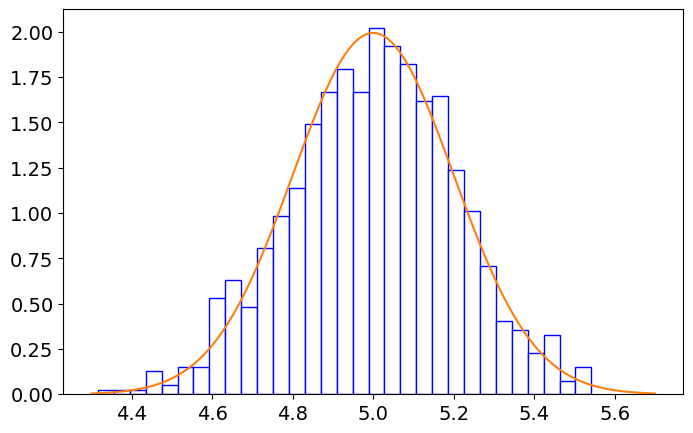

In [16]:
plt.hist(xbar_I,bins=int(np.sqrt(Nmonte)),density=True,fc='white',ec='b');
x_x = mu + np.linspace(-3.5,3.5,100) *(sigma/np.sqrt(n))
plt.plot(x_x,stats.norm(loc=mu,scale=sigma/np.sqrt(n)).pdf(x_x));

## 3 Confidence Intervals

We can use the sample mean
${\color{royalblue}{{{\overline{X}}}}} = \frac{1}{n}\sum_{i=1}^n{\color{royalblue}{X_i}}$ and sample variance
$${\color{royalblue}{S^2}} = \frac{1}{n-1}\sum_{i=1}^n\left({\color{royalblue}{X_i}}-{\color{royalblue}{{{\overline{X}}}}}\right)^2$$
as the basis for standard statistical inferences.

In addition to ${E\left[{\color{royalblue}{{{\overline{X}}}}}\right]} = \mu$ and $\operatorname{Var}({\color{royalblue}{{{\overline{X}}}}})
  =\frac{\sigma^2}{n}$ mentioned above, we also have
${E\left[{\color{royalblue}{S^2}}\right]} = \sigma^2$.

Note that
${\color{royalblue}{{{\overline{X}}}}}$ is known as an **unbiased estimator**
of $\mu$ because ${E\left[{\color{royalblue}{{{\overline{X}}}}}\right]}=\mu$,
and likewise for ${\color{royalblue}{S^2}}$ with $\sigma^2$.

We can use the sample mean ${\color{royalblue}{{{\overline{X}}}}}$ and variance ${\color{royalblue}{S^2}}$
to construct statistics
$${\color{royalblue}{Z}} = \frac{{\color{royalblue}{{{\overline{X}}}}}-\mu}{\sqrt{\sigma^2/n}}$$
and
$${\color{royalblue}{T}} = \frac{{\color{royalblue}{{{\overline{X}}}}}-\mu}{\sqrt{{\color{royalblue}{S^2}}/n}}$$

Some important results from introductory statistics:

1.  When the underlying distribution $f(x;\mu,\sigma)$ is a
    Gaussian (normal) $N(\mu.\sigma^2)$ with the appropriate parameters,
    then ${\color{royalblue}{Z}}$ is a standard normal random variable
    $N(0,1)$, and ${\color{royalblue}{T}}$ is Student-$t$ distributed with
    $n-1$ degrees of freedom. (Student’s Theorem.)

2.  When the sample size is large enough ($n\gtrsim 30$
    for ${\color{royalblue}{Z}}$ and $n\gtrsim 40$ for ${\color{royalblue}{T}}$), for any underlying
    distribution, both ${\color{royalblue}{Z}}$ and ${\color{royalblue}{T}}$ are
    approximately normally distributed. (**Central Limit Theorem**.)

(It's often worth using the $t$ distribution for ${\color{royalblue}{T}}$ even when $n$ is large)

This can be used to construct a *confidence interval* for the parameter
$\mu$. For example, if $n$ is large, the statistic ${\color{royalblue}{Z}}$
will have a 5% chance of exceeding the 95th percentile of the standard
normal distribution $z_{.95}\approx 1.645$.

In [17]:
stats.norm.ppf(.95)

1.6448536269514722

Note that this convention (Conover's) is the opposite of the notational convention in e.g., Devore, where $z_{\alpha}$ is the $(1-\alpha)\times 100$th percentile rather than the $\alpha\times 100$th.

In [18]:
stats.norm.isf(.05)

1.6448536269514729

This means that
$$.05 \approx
P\left({\color{royalblue}{Z}}{\mathbin{>}}z_{.95}\right)
=P\left(\frac{{\color{royalblue}{{{\overline{X}}}}}-\mu}{\sigma/\sqrt{n}}{\mathbin{>}}z_{.95}\right)
  =P\left(\mu{\mathbin{<}}{\color{royalblue}{{{\overline{X}}}}} - z_{.95} \sigma\left/\sqrt{n}\right.\right)$$
If ${\color{royalblue}{Z}}$, and thus ${\color{royalblue}{{{\overline{X}}}}}$, is unusually high, the unknown $\mu$ will be a lot lower than the estimate ${\color{royalblue}{{{\overline{X}}}}}$.

Likewise, ${\color{royalblue}{Z}}$ has a 5% chance of being less than the 5th percentile
$z_{.05}\approx -1.645$.

In [19]:
stats.norm.ppf(.05)

-1.6448536269514729

Note $z_{.05}=-z_{.95}$ because the
standard normal pdf is symmetric about the origin.

In [20]:
stats.norm.ppf(.95)

1.6448536269514722

So we have
$$.05 \approx
  P\left(\frac{{\color{royalblue}{{{\overline{X}}}}}-\mu}{\sigma\left/\sqrt{n}\right.}{\mathbin{<}}z_{.05}\right)
  =P\left({\color{royalblue}{{{\overline{X}}}}} - z_{.05} \sigma\left/\sqrt{n}\right.{\mathbin{<}}\mu\right)
  =P\left({\color{royalblue}{{{\overline{X}}}}} + z_{.95} \sigma\left/\sqrt{n}\right.{\mathbin{<}}\mu\right)
  $$
If ${\color{royalblue}{Z}}$, and thus ${\color{royalblue}{{{\overline{X}}}}}$, is unusually low, the unknown $\mu$ will be a lot higher than the estimate ${\color{royalblue}{{{\overline{X}}}}}$

There is a 90% chance that ${\color{royalblue}{Z}}$ is neither below the 5th nor above the 95th percentile, in which case the interval bounded by
${\color{royalblue}{{{\overline{X}}}}} \pm z_{.95}\,\sigma\left/\sqrt{n}\right.$
will contain the true mean value $\mu$.

We call this a 90% confidence
interval. Note that the random quantity associated with the probability
is not the unknown value of $\mu$ (which is treated as fixed but unknown
in the classical frequentist formalism), but rather the endpoints of the
confidence interval constructed from random data.

Given an actual data
set $\{x_i\}$, we construct the confidence interval as
${{\overline{x}}}\pm z_{.95}\,\sigma\left/\sqrt{n}\right.$.

To illustrate the confidence interval, consider a sample of size $n=10$:

In [21]:
np.random.seed(201908291)
n = 10
mu =  5
sigma = 2
x_i = stats.norm(loc=mu,scale=sigma).rvs(size=n); x_i

array([4.82549021, 4.80011841, 9.33390616, 4.77075172, 4.04077905,
       5.43113622, 3.40560746, 7.08252028, 6.973821  , 3.25065825])

In [22]:
x_i

array([4.82549021, 4.80011841, 9.33390616, 4.77075172, 4.04077905,
       5.43113622, 3.40560746, 7.08252028, 6.973821  , 3.25065825])

Suppose we know the underlying population has $\sigma=2$.  We can construct a $90\%$ confidence interval:

In [23]:
alpha = 0.10; zcrit = stats.norm.ppf(1.-0.5*alpha)
print('z_%.2f = %g' % (1.-0.5*alpha,zcrit))

z_0.95 = 1.64485


In [24]:
xbar = np.mean(x_i); halfwidth = zcrit * sigma/np.sqrt(n) 
print ('%.0f%% CI is %g +/- %g i.e., (%g,%g)'
       % (100*(1.-alpha),xbar,halfwidth,xbar-halfwidth,xbar+halfwidth))

90% CI is 5.39148 +/- 1.0403 i.e., (4.35118,6.43178)


As it happens the confidence interval does contain the true (unknown to the observer) value $\mu=5$.
There was a $90\%$ chance of this happening given how the data were generated.  We can test this with a Monte Carlo by generating $N=1000$ samples, each with its own confidence interval, and seeing how many of them contain the true value...

In [25]:
Nmonte = 1000
x_Ii = stats.norm(loc=mu,scale=sigma).rvs(size=(Nmonte,n))
xbar_I = np.mean(x_Ii,axis=-1)
CIlo_I = xbar_I - halfwidth
CIhi_I = xbar_I + halfwidth

`CIlo_I` is an array of the lower bounds of $N$ confidence intervals, and `CIhi_I` is an array of the corresponding upper bounds.  To count how many contain the true value $\mu$, construct a *Boolean array* which contains `True` for each confidence interval containing $\mu$ and `False` for each which doesn't:

In [26]:
inCI_I = (CIlo_I<mu) & (mu<CIhi_I)

Rather than look at all 1000 elements, let's just see the first 20:

In [27]:
inCI_I[:20]

array([ True,  True,  True,  True, False,  True,  True, False, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False])

If we try to do math on the boolean variables, `True` is converted to $1$ and `False` to $0$, so we can take the sum to count how many are true:

In [28]:
sum(inCI_I)

913

And to get the fraction that contain it, use the mean:

In [29]:
np.mean(inCI_I)

0.913

Of course, this is not exactly 90\% because things are random.

A question for you to consider (and answer on the homework): if you have 1000 confidence intervals, each of which is supposed to have a 90\% chance of containing the true $\mu$, how far from the expected number of 900 is it reasonable for the actual number containing $\mu$ to be?

If the population standard deviation $\sigma$ is not known, the confidence interval has to be constructed from the statistic ${\color{royalblue}{T}}$ instead, and this follows a Student-$t$ distribution with $n-1$ degrees of freedom, whose 95th percentile is $t_{n-1,0.95}$.  The confidence interval construction is
\begin{align*}
0.90
&=P\left(
{\color{royalblue}{{{\overline{X}}}}} - t_{n-1,0.95} \sqrt{{\color{royalblue}{S^2}}/n}
{\mathbin{<}}\mu{\mathbin{<}}
{\color{royalblue}{{{\overline{X}}}}} - t_{n-1,0.05} \sqrt{{\color{royalblue}{S^2}}/n}
\right)\\
&=P\left(
{\color{royalblue}{{{\overline{X}}}}} - t_{n-1,0.95} \sqrt{{\color{royalblue}{S^2}}/n}
{\mathbin{<}}\mu{\mathbin{<}}
{\color{royalblue}{{{\overline{X}}}}} + t_{n-1,0.95} \sqrt{{\color{royalblue}{S^2}}/n}
\right)
\end{align*}
and the 90\% confidence interval has endpoints ${{\overline{x}}}\pm t_{n-1,0.95}\,s\left/\sqrt{n}\right.$.

Note that as $n$ gets large $t_{n-1,0.95}$ is becomes well approximated by $z_{0.95}$

In [30]:
print('z_{%.2f}=%g'%(.95,stats.norm.ppf(.95)))
n=10; print('t_{%d-1,%.2f}=%g'%(n,.95,stats.t(df=n-1).ppf(.95)))
n=50; print('t_{%d-1,%.2f}=%g'%(n,.95,stats.t(df=n-1).ppf(.95)))
n=100; print('t_{%d-1,%.2f}=%g'%(n,.95,stats.t(df=n-1).ppf(.95)))

z_{0.95}=1.64485
t_{10-1,0.95}=1.83311
t_{50-1,0.95}=1.67655
t_{100-1,0.95}=1.66039


One final thing to note is that the central limit theorem means that the
confidence interval construction is correct (for a sufficiently large sample) even if the sampling
distribution is not normal, as long as it has a finite mean $\mu$ and
variance $\sigma$.  (You will demonstrate this on the homework.)  However, it may not be the narrowest confidence
interval we could construct at that confidence level, if the underlying
distribution is non-normal.

### 3.1 Additional Demonstrations

A more extensive demonstration of Monte Carlo testing of confidence intervals can be found at [https://ccrg.rit.edu/~whelan/courses/2019_1sp_MATH_252/data/notebook07.html](https://ccrg.rit.edu/~whelan/courses/2019_1sp_MATH_252/data/notebook07.html) (HTML) or [https://ccrg.rit.edu/~whelan/courses/2019_1sp_MATH_252/data/notebook07.ipynb](https://ccrg.rit.edu/~whelan/courses/2019_1sp_MATH_252/data/notebook07.ipynb) (Jupyter notebook).  Use the username `bayes` and password `normal` to access them.

I've also added these in the "Bonus Notebooks" section of mycourses as [notebook07.ipynb](notebook07.ipynb) and [notebook07.html](notebook07.html), and they should be available on the JupyterHub server in the `lesson_01_2` directory

## 4. Empirical Distributions

One piece of standard descriptive statistics that can actually be
considered as a form of nonparametric inference is the histogram, which
can be thought of as an approximation to either the pdf $f(x)$ or the
pmf $p(x)$, depending on the sort of random variable we’re dealing with.
For example, consider the following data sample (which we simulate from a Gamma distribution):

In [31]:
np.random.seed(20190830)
mydist = stats.gamma(3,scale=10)
x_i = mydist.rvs(size=20); x_i

array([15.94420646, 17.51327282, 15.13078775, 30.06930302,  4.62768542,
       31.25138262, 15.29354725,  8.74925894, 42.73421896, 33.86779996,
       12.07118377, 42.26325192, 15.6472292 , 71.31759161, 36.37756461,
       28.21606997,  6.0924872 , 21.42833122, 42.17010054, 28.14867231])

For a small set of data, we can construct the histogram by hand, but NumPy provides a function which does the work for us:

(array([3., 6., 3., 4., 3., 0., 0., 1.]),
 array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <BarContainer object of 8 artists>)

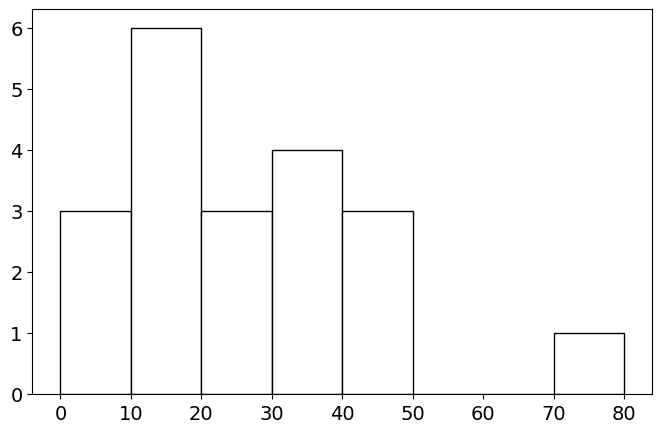

In [32]:
plt.hist(x_i,color='w',edgecolor='k',bins=np.arange(0,90,10))

We see that 3 of the values are between 0 and 10, 6 between 10 and 20, etc.

If we want to turn this into an estimate of the pdf, though, we should scale the histogram so that the area under it adds up to one, and NumPy can also do that automatically, and then compare the histogram to the actual pdf of the distribution from which the data were drawn.

(array([0.015, 0.03 , 0.015, 0.02 , 0.015, 0.   , 0.   , 0.005]),
 array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <BarContainer object of 8 artists>)

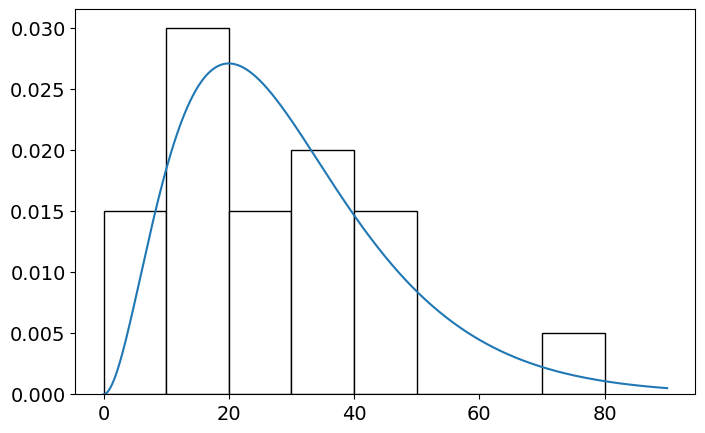

In [33]:
x_x = np.linspace(0.,90.,1000)
plt.plot(x_x,mydist.pdf(x_x));
plt.hist(x_i,color='w',edgecolor='k',density=True,bins=np.arange(0,90,10))

However, when you make a histogram, you need to decide where to place your bins, i.e., how finely are you going to divide up the $x$ values?  We could use larger bins, and then the histogram would be coarser but less susceptible to bin-to-bin fluctuations: 

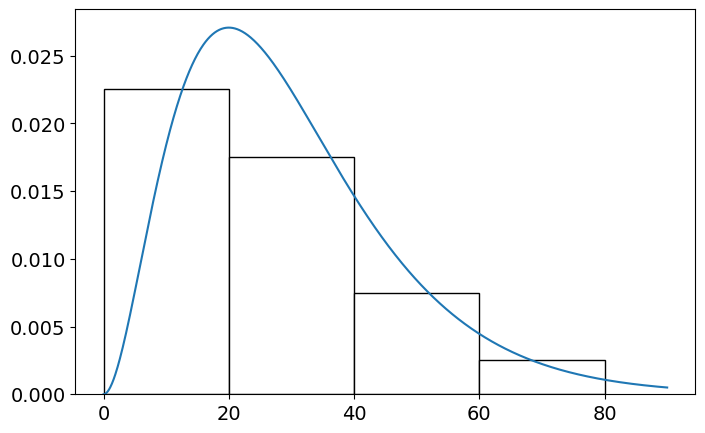

In [34]:
plt.hist(x_i,color='w',edgecolor='k',density=True,bins=np.arange(0,90,20));
plt.plot(x_x,mydist.pdf(x_x));

A way around that is to estimate the cdf
$F(x)=P({\color{royalblue}{X}}\le x)$ rather than the pdf or pmf. The
empirical distribution function $\hat{F}(x;\{x_i\})$ \[which Conover
calls $S(x)$\] is just the fraction of observations $\{x_i\}$ that are
less than or equal to $x$. This can be easily estimated by using NumPy’s
Boolean array construction; `A<=B` is an array containing `True`
wherever the inequalities is satisfied, and `False` wherever it’s not.

In [35]:
mymask_xi = x_i[None,:] <= x_x[:,None]; mymask_xi

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [36]:
mymask_xi.shape

(1000, 20)

This is a $1000\times20$ boolean aray, telling us whether $x_i\le x$ for each of the thousand $x$ values we plot and each of the twenty $x_i$ values in the sample.  If we take the mean of this array over $i$ for each of the $x$ values, it gives the fraction of `True` values, which is the empirical distribution function evaluated at $x$.

In [37]:
Phat_x = np.mean(mymask_xi,axis=-1)
Phat_x.shape, Phat_x

((1000,),
 array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.05, 0.05, 0.05,
        0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
        0.05, 0.05, 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
        0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 ,
        0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.15,
        0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
        0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
        0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15,
        0.15, 0.15, 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 , 0.2 ,
        0.2 , 0.2 , 0.2 , 0.

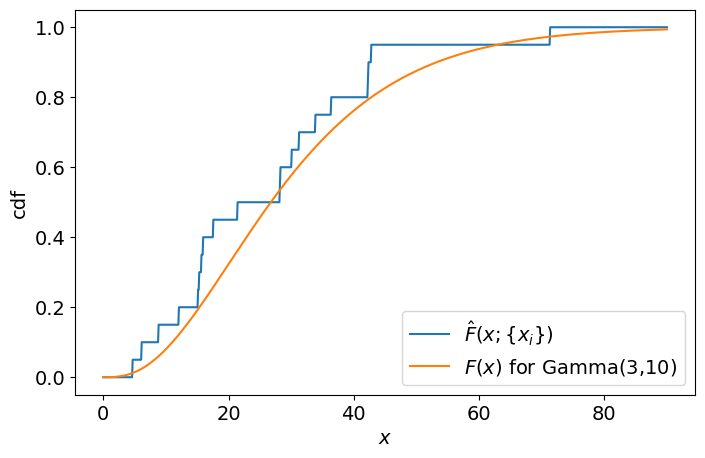

In [38]:
plt.plot(x_x,Phat_x,label=r'$\hat{F}(x;\{x_i\})$');
plt.plot(x_x,mydist.cdf(x_x),label=r'$F(x)$ for Gamma(3,10)');
plt.legend(loc='lower right');
plt.xlabel(r'$x$');
plt.ylabel('cdf');

A few notes:

  * We've plotted the cdf of the Gamma distribution for comparison.  If we didn't know that the data came from that distribution, we could use this comparion to check that.  We will come back to this in Conover Chapter Six, about the Kolmogorov-Smirnov and related tests.

  * We didn't actually need to use a thousand $x$ values, since the empirical distribution function only changes value when $x$ passes through one of the $\{x_i\}$, but it works and doesn't burn up too much computing time.

  * Conover considers a more involved method of estimating the survival function $1-F(x)$ in cases where some of the data are missing, known as the Kaplan-Meier estimator, but we’ll skip over that as it’s a bit advanced for our purposes right now.